# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 11.11.2019

Мягкий дедлайн: 1:59MSK 22.11.2019

Жесткий дедлайн: 23:59MSK 23.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/15454/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

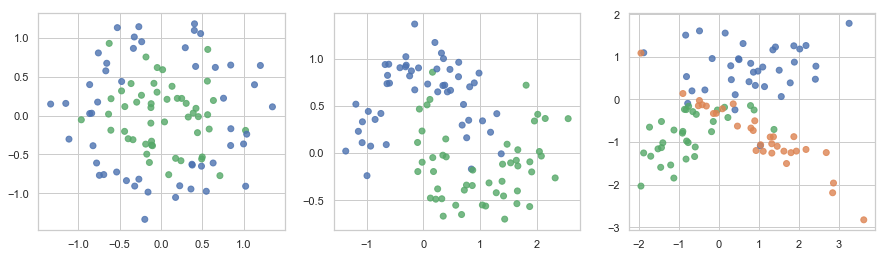

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

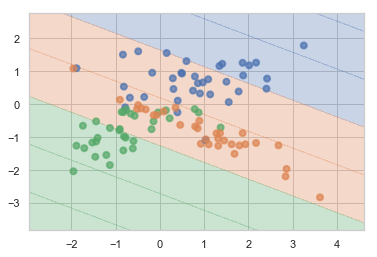

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

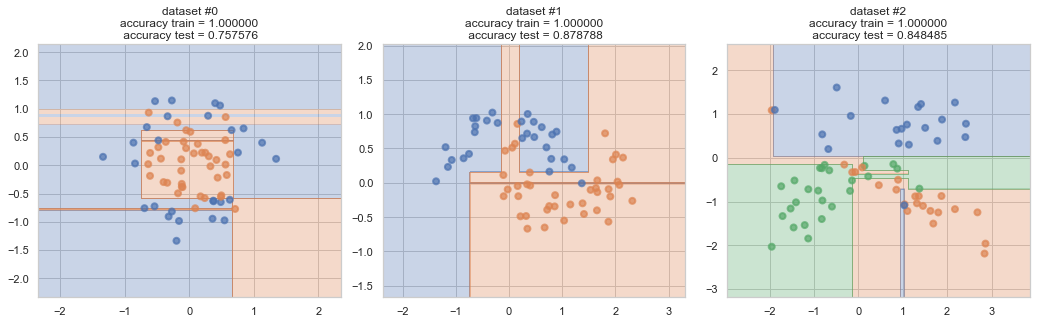

In [7]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, x_train, y_train)
    
    plt.title('dataset #%d\naccuracy train = %lf\n accuracy test = %lf' % (i, clf.score(x_train, y_train), clf.score(x_test, y_test)))

__Ответ:__ Видно, что модель сильно подстроилась под выборку (accuracy на трейне = 1), а на тесте ниже. => Да, дереьвя довольно сильно переобучились.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

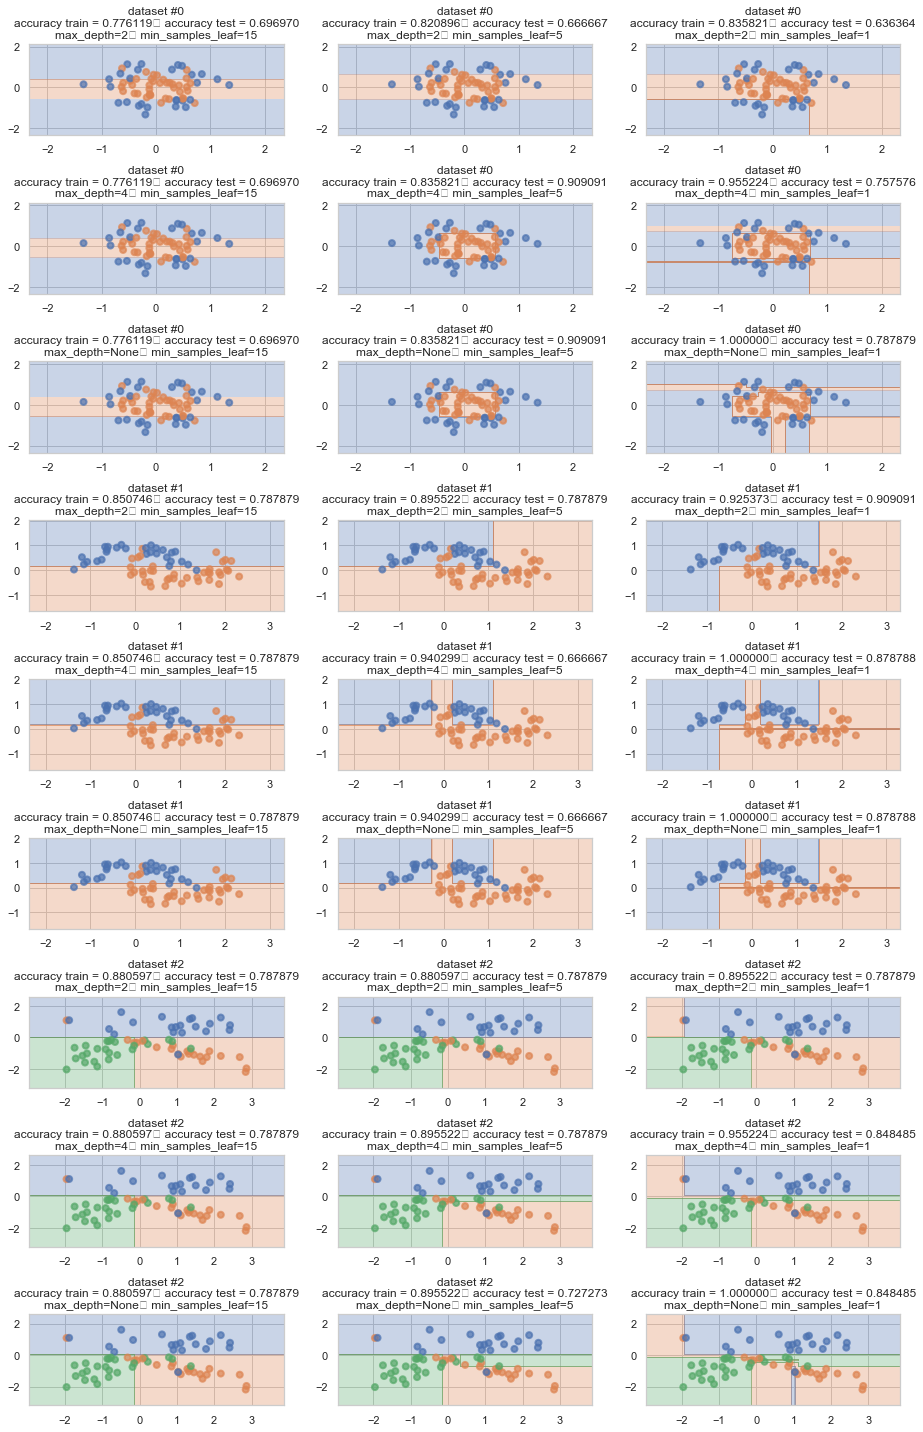

In [35]:
#w, h = plt.figaspect(2.)
plt.figure(figsize=(13, 20))
for k, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(x_train, y_train)
        
            # plt.subplot(3, 3, k + i + j + 1)
            plt.subplot2grid((9, 3), (3 * k + i, j))
            plot_surface(clf, x_train, y_train)
    
            plt.title('dataset #%d\naccuracy train = %lf\t accuracy test = %lf\nmax_depth=%s\t min_samples_leaf=%s' % (k, clf.score(x_train, y_train), clf.score(x_test, y_test), str(max_depth), str(min_samples_leaf)))
plt.tight_layout()
plt.show()

__Ответ:__

1. Для датасета #0. С уменьшением min_samples_leaf деревья начинают подстраиваться под выборку и переобучаться: accuracy train увеличивается, а accuracy test уменьшается, тем не менее самый оптимальный вариант достигается на min_samples_leaf = 5. Увеличение глубины max_depth при каком-то фиксированном min_samples_leaf увеличивает качество, как на трейне, так и на тесте.

2. Датасет #2. При маленькой максимальной глубине (2), уменьшение минимального количества объектов в листе приводит к повышению качества на обеих выборках. Далее, при глубине >= 4 любое число объектов в листе приводит к переобучению: качество на трейне почти 1, а на тесте сильно хуже.

3. Датасет #3. Аналогично.

В общем и целом можно сказать, что большая максимальная глубина и маленькое min_samples_leaf сильно подстраивают дерево под выборку и приводят к переобучению.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [366]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    srtd_ind = np.argsort(feature_vector)
    fs = feature_vector[srtd_ind]
    m = fs[1:] != fs[:-1]
    ts = target_vector[srtd_ind]
    
    thresholds = ((fs[:-1] + fs[1:]) / 2)[m]
    R = len(ts)
    
    # Rl
    Rl_tot = np.arange(1, R)
    Rl_pos = np.cumsum(ts)
    
    tot_pos = Rl_pos[-1] 
    Rl_pos = Rl_pos[:-1]
    
    Rl_p1 = Rl_pos / Rl_tot
    Rl_p0 = 1 - Rl_p1
    
    # Rr
    Rr_tot = R - Rl_tot
    Rr_pos = tot_pos - Rl_pos
    
    Rr_p1 = Rr_pos / Rr_tot
    Rr_p0 = 1 - Rr_p1
    
    HRl = 1 - Rl_p1 ** 2 - Rl_p0 ** 2
    HRr = 1 - Rr_p1 ** 2 - Rr_p0 ** 2
    
    ginis = -Rl_tot / R * HRl - Rr_tot / R * HRr
    ginis = ginis[m]
    
    gini_best_ind = np.argmax(ginis)
    gini_best = ginis[gini_best_ind]
    threshold_best = thresholds[gini_best_ind]
        
    return thresholds, ginis, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [540]:
data = pd.read_csv("students.csv")

In [541]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [542]:
y = (data[data.columns[-1]]).values
ths_stg, gs_stg, tb_stg, gb_stg = find_best_split((data['STG']).values, y)
ths_scg, gs_scg, tb_scg, gb_scg = find_best_split((data['SCG']).values, y)
ths_str, gs_str, tb_str, gb_str = find_best_split((data['STR']).values, y)
ths_lpr, gs_lpr, tb_lpr, gb_lpr = find_best_split((data['LPR']).values, y)
ths_peg, gs_peg, tb_peg, gb_peg = find_best_split((data['PEG']).values, y)

bests = [(tb_stg, gb_stg), (tb_scg, gb_scg), (tb_str, gb_str), (tb_lpr, gb_lpr), (tb_peg, gb_peg)]

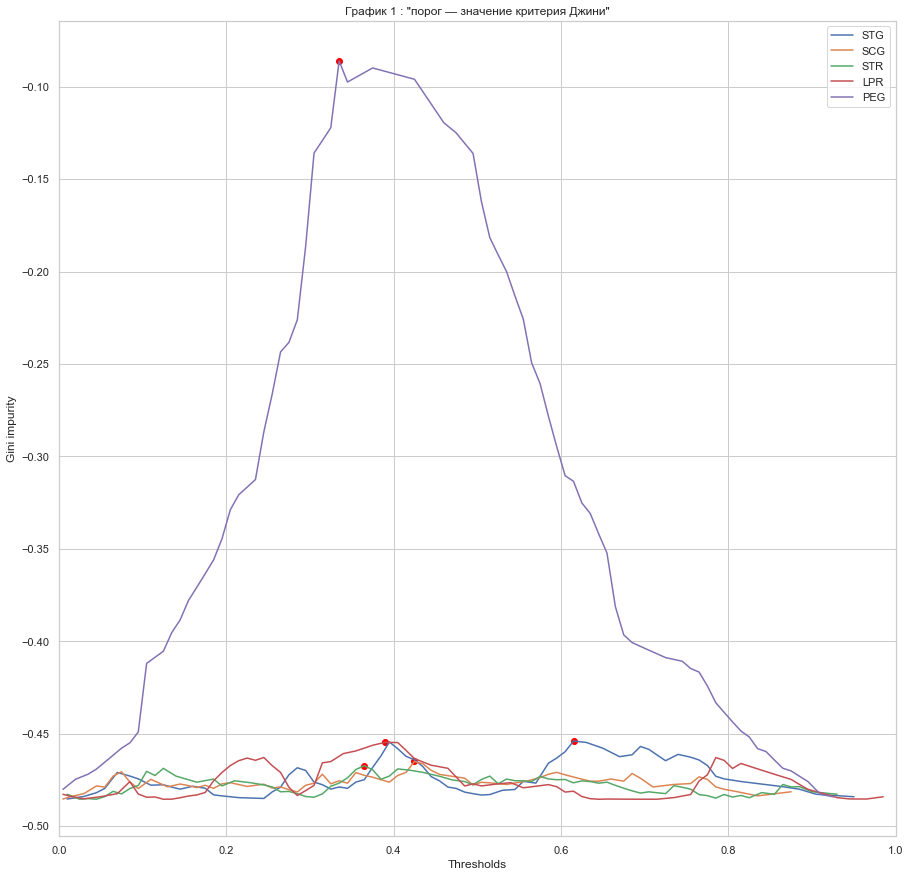

In [543]:
plt.figure(figsize=(15,15))
plt.plot(ths_stg, gs_stg, label='STG')
plt.scatter(tb_stg, gb_stg, c='red')
plt.plot(ths_scg, gs_scg, label='SCG')
plt.scatter(tb_scg, gb_scg, c='red')
plt.plot(ths_str, gs_str, label='STR')
plt.scatter(tb_str, gb_str, c='red')
plt.plot(ths_lpr, gs_lpr, label='LPR')
plt.scatter(tb_lpr, gb_lpr, c='red')
plt.plot(ths_peg, gs_peg, label='PEG')
plt.scatter(tb_peg, gb_peg, c='red')
plt.xlim([0.0, 1.0])
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Gini impurity')
plt.title('График 1 : "порог — значение критерия Джини"')
plt.show()

График 2: "значение признака — класс"


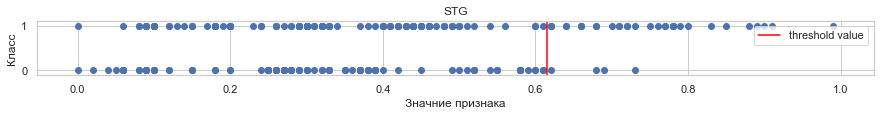

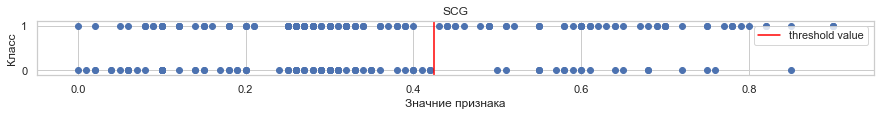

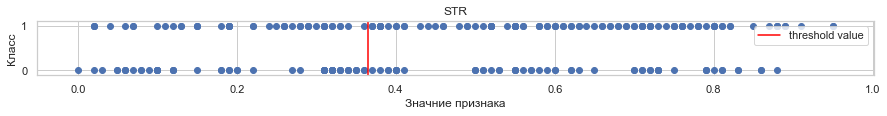

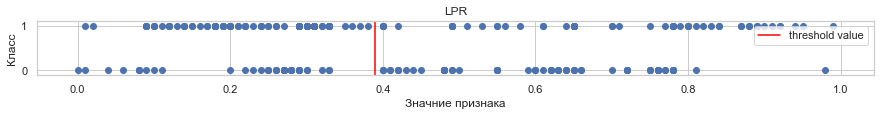

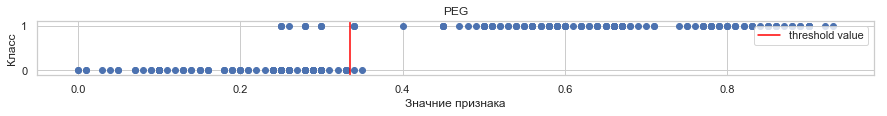

In [544]:
print('График 2: "значение признака — класс"')
for i, feat_name in enumerate(data.columns[:-1]):
    plt.figure(figsize=(15,1))
    plt.scatter((data[feat_name]).values, y)
    plt.axvline(bests[i][0], c='red', label='threshold value')
    plt.title(feat_name)
    plt.ylabel('Класс')
    plt.xlabel('Значние признака')
    plt.legend()
    plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [528]:
tb_peg, gb_peg

(0.335, -0.0860656027491214)

**Ответ:** Исходя из кривых значений критерия Джини, деление выборки на 2 поддерева нужно производить по признаку PEG. Этот результат хорошо согласуется с scatter plot: лучший threshold, соответствующий лучшему значению критерия, равен 0.335, из scatter плота видно, что признаки наилучшим образом отделяются этим значением.

Для остальных признаков, вне зависимости от разделяющей объекты из разных классов прямой threshold их количество по обеи стороны примерно одинаково, что хорошо видно из scatter-графиков. Их кривые тоже находятся примерно на одном "уровне", то есть значения функции примерно одинаковы для любого x.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [448]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
    def get_params(self, deep=True):
        return {'feature_types': self._feature_types}
        
    def _fit_node(self, sub_X, sub_y, node):
        # != -> == 
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]): # 1 -> 0
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click /  current_count # current_count / current_click
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) # если категории, то где лямбда не x[1], а x[0]
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature]))) # np.array -> list(np.array(...))
            else:
                raise ValueError
                

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": # C -> c
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            # most_common(1) -> most_common(1)[0][0]
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"]) # split -> np.logical_not(split)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']

        feature = node['feature_split']
        feature_type = self._feature_types[feature]

        if feature_type == 'real':
            threshold = node['threshold']
        elif feature_type == 'categorical':
            threshold = node['categories_split']

        if (feature_type == 'real' and x[feature] < threshold) or (feature_type == 'categorical' and x[feature] in threshold):
            return self._predict_node(x, node['left_child'])
        else:
            return self._predict_node(x, node['right_child'])
                
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [529]:
d = pd.read_csv("agaricus-lepiota.data")
y = d['p'].map({'e' : 1, 'p': 0})
x = d.drop(columns='p')

In [374]:
x.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [375]:
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [376]:
x.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [377]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.33, random_state=42)

In [378]:
feature_types = np.array(list(map(lambda x: 'categorical', x.columns)))
tree = DecisionTree(feature_types)
tree.fit(x_train, y_train)
pred = tree.predict(x_test)

In [533]:
print('accuracy: %lf' % (accuracy_score(y_test, pred)))

accuracy: 1.000000


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [401]:
import requests
import io

def s(url):
    return requests.get(url).content

mush = pd.read_csv('agaricus-lepiota.data')
tic = pd.read_csv(io.StringIO(s('http://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data').decode('utf-8')))
cars = pd.read_csv(io.StringIO(s('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data').decode('utf-8')))
nurs = pd.read_csv(io.StringIO(s('http://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data').decode('utf-8')))

In [474]:
x_mush = mush.apply(LabelEncoder().fit_transform)
y_mush = x_mush['p']
x_mush = x_mush.drop(columns='p')

x_tic = tic.apply(LabelEncoder().fit_transform)
y_tic = x_tic['positive']
x_tic = x_tic.drop(columns='positive')

y_cars = cars['unacc'].map({'unacc' : 0, 'acc' : 0, 'vgood' : 1, 'good' : 1})
x_cars = cars.drop(columns='unacc')
x_cars = x_cars.apply(LabelEncoder().fit_transform)

y_nurs = nurs['recommend'].map({'very_recom' : 1, 'priority' : 1, 'spec_prior' : 1, 'not_recom': 0, 'recommend' : 0})
x_nurs = nurs.drop(columns='recommend')
x_nurs = x_nurs.apply(LabelEncoder().fit_transform)

In [580]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder

def feat_real(name, x, y):
    feature_types = np.array(list(map(lambda x: 'real', x.columns)))
    tree1 = DecisionTree(feature_types)
    return cross_val_score(tree1, x.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
def feat_cat(name, x, y):
    feature_types = np.array(list(map(lambda x: 'categorical', x.columns)))
    tree1 = DecisionTree(feature_types)
    return cross_val_score(tree1, x.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
def feat_real_ohe(name, x, y):
    x = OneHotEncoder(sparse=False).fit_transform(x)
    feature_types = ['real' for i in range(x.shape[1])]
    tree1 = DecisionTree(feature_types)
    return cross_val_score(tree1, x, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
def feat_dc(name, x, y):
    tree1 = DecisionTreeClassifier()
    return cross_val_score(tree1, x, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()

ind = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
df = pd.DataFrame(index=ind)

df['algo1'] = pd.Series([feat_real('mushrooms', x_mush, y_mush),
                         feat_real('tic-tac-toe', x_tic, y_tic),
                         feat_real('cars  ', x_cars, y_cars),
                         feat_real('nursery', x_nurs, y_nurs)],
                        index=df.index)

df['algo2'] = pd.Series([feat_cat('mushrooms', x_mush, y_mush),
                         feat_cat('tic-tac-toe', x_tic, y_tic),
                         feat_cat('cars  ', x_cars, y_cars),
                         feat_cat('nursery', x_nurs, y_nurs)],
                        index=df.index)

df['algo3'] = pd.Series([feat_real_ohe('mushrooms', x_mush, y_mush),
                         feat_real_ohe('tic-tac-toe', x_tic, y_tic),
                         feat_real_ohe('cars  ', x_cars, y_cars),
                         feat_real_ohe('nursery', x_nurs, y_nurs)],
                        index=df.index)

df['algo4'] = pd.Series([feat_dc('mushrooms', x_mush, y_mush),
                         feat_dc('tic-tac-toe', x_tic, y_tic),
                         feat_dc('cars  ', x_cars, y_cars),
                         feat_dc('nursery', x_nurs, y_nurs)],
                        index=df.index)

**Ответ:**

In [581]:
df

,algo1,algo2,algo3,algo4
mushrooms,0.999261,1.000000,0.999631,0.962716
tic-tac-toe,0.462697,0.549265,0.553520,0.748617
cars,0.942600,0.967519,0.921767,0.940955
nursery,0.999846,0.999923,0.999769,0.999846


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [599]:
def sort_by_alg_res(name):
    print("\n", name, ":\n" , ' <= '.join(list(df.sort_values(by=name, axis=1, ascending=False).columns)))
    
for col in df.index:
    sort_by_alg_res(col)


 mushrooms :
 algo2 <= algo3 <= algo1 <= algo4

 tic-tac-toe :
 algo4 <= algo3 <= algo2 <= algo1

 cars :
 algo2 <= algo1 <= algo4 <= algo3

 nursery :
 algo2 <= algo4 <= algo1 <= algo3


In [602]:
print(mush.shape[1], tic.shape[1], cars.shape[1], nursery.shape[1])

23 10 7 9


In [614]:
tic['positive'].values

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

Как видно из результатов выше, ранжирование алгоритмов для каждого набора данных разное. В целом, для всех датасетов, кроме tic-tac-toe, лучше всего себя проявил алгоритм №2, т.е. DecisionTree, считающий все признаки категориальными, что вполне логично, потому что действительно во всех датасетах все признаки были категориальными. Стоит также заметить, что объекты в tic-tac-toe уже отсортированы по таргету.

Если несколько раз запускать алгоритм для оценивания accuracy из предыдущего пункта, то результаты будут всегда одинаковыми. Поэтому, на мой взгляд, компоненты случайности здесь нет.